# Customer Segmentation Clustering

[Kausik Chattapadhyay](https://github.com/chatkausik)

## Import Modules

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

# Setup Seaborn
sns.set_style('whitegrid')
sns.set_context('poster')

## Dataset

This data contain information onn marketing email cmapaigns (newsletters) and transaction level data from customers.

In [8]:
df_offers = pd.read_excel('WineKMC.xlsx', "OfferInformation")
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [9]:
df_transactions = pd.read_excel('WineKMC.xlsx', "Transactions")
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data Wrangling

In [10]:
df = df_offers.merge(df_transactions)

matrix = df.pivot_table(index='customer_name', columns=['offer_id'], values=['n'])
matrix = matrix.fillna(0)
matrix

n                           ...                              
offer_id        1    2    3    4    5    6   ...   27   28   29   30   31   32
customer_name                                ...                              
Adams          0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  1.0  0.0  0.0
Allen          0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0
Anderson       0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
Bailey         0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0
Baker          0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
Williams       0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0
Wilson         0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0
Wood           1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0
Wright         0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0  0.0  0.0  0.0  0.0
Young          0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0  1.0  1.0

[100 rows x 32 columns]

## K-Means Clustering

In [13]:
x_cols = matrix.to_numpy()
x_cols

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])

Text(0, 0.5, 'SS')

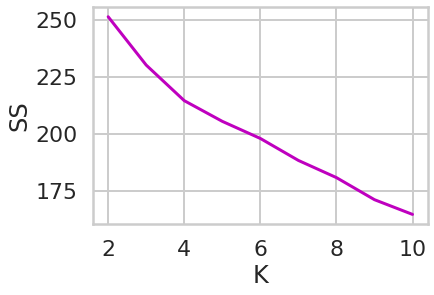

In [14]:
K = list(range(2,11))
y = []
for i in K:
  kmeans = KMeans(n_clusters=i, random_state=1, init='k-means++')
  kmeans.fit(x_cols)
  labels=kmeans.labels_
  y.append(kmeans.inertia_)

plt.plot(K, y, color='m')
plt.xlabel('K')
plt.ylabel('SS')

Text(0, 0.5, 'Size')

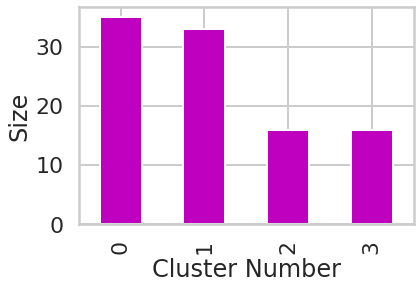

In [15]:
## Elbow point where slope of line is lower = 4
cluster = KMeans(n_clusters=4, random_state=21)
matrix['cluster'] = cluster.fit_predict(x_cols)
matrix.cluster.value_counts().sort_index().plot(kind='bar', color='m')
plt.xlabel('Cluster Number')
plt.ylabel("Size")

## Silhoutte_Score

[0.09174871508750351, 0.12078917343046144, 0.13625206450999705, 0.13342082274174838, 0.14323201540145195, 0.12257725324091606, 0.13122262069182644, 0.12075610691069225, 0.12877743414473572]


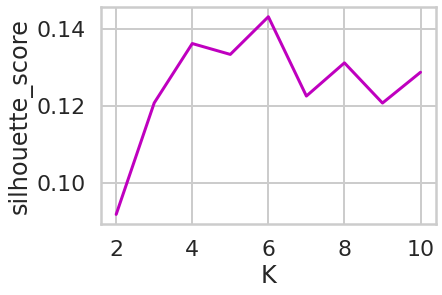

In [16]:
ys = []
for i in K:
  kmeans = KMeans(n_clusters=i, random_state=21)
  kmeans.fit(x_cols)
  labels=kmeans.labels_
  ys.append(silhouette_score(x_cols, labels))

plt.plot(K, ys, color='m')
plt.xlabel("K")
plt.ylabel("silhouette_score")
## Best K = 6 - the middle one
print(ys)

## Visualizing Clusters Using PCA

In [17]:
kmeans4 = KMeans(n_clusters=4, random_state=21)

In [28]:
def plot_pca(matrix, x_cols, clf):
  clf.fit(x_cols)
  labels = clf.labels_
  pca = sklearn.decomposition.PCA(n_components=2)
  pca.fit(matrix)
  new_matrix = pd.DataFrame(pca.transform(matrix))
  new_matrix.index = matrix.index
  new_matrix.columns=['X', 'y']
  new_matrix['labels'] = labels
  
  sns.lmplot(x='X', y='y', hue='labels', 
             data=new_matrix, 
             fit_reg=False, 
             height=7,
             aspect=2)

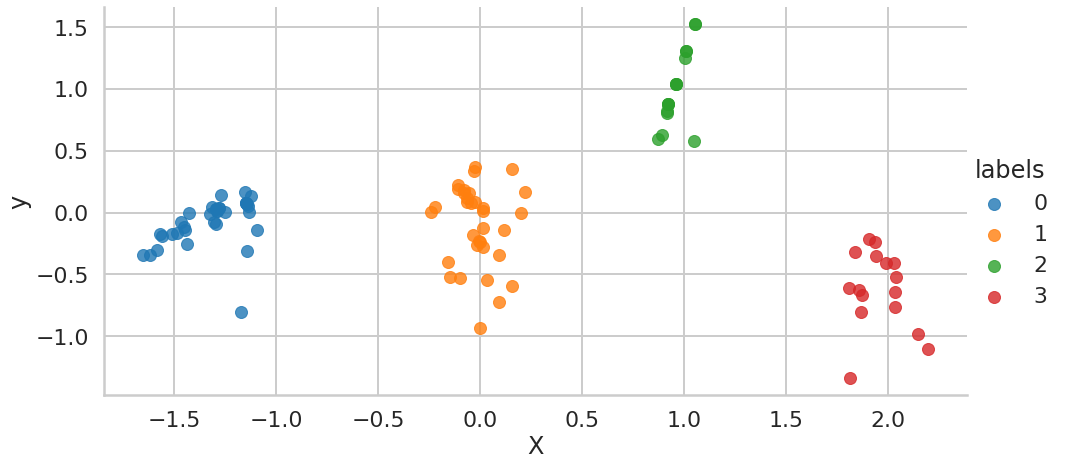

In [29]:
# Plot with K=4
plot_pca(matrix, x_cols, kmeans4)

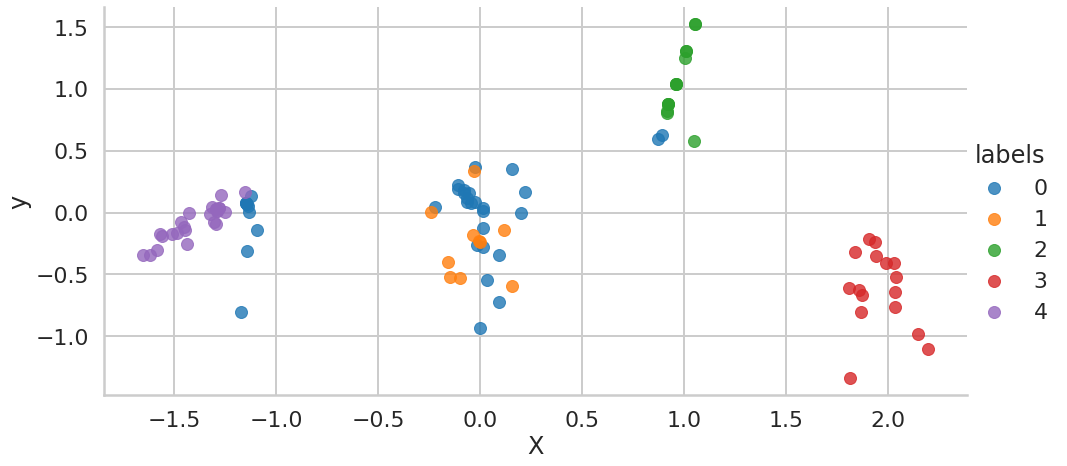

In [31]:
## Plot with K=5
kmeans5 = KMeans(n_clusters=5, random_state=21)
plot_pca(matrix, x_cols, kmeans5)

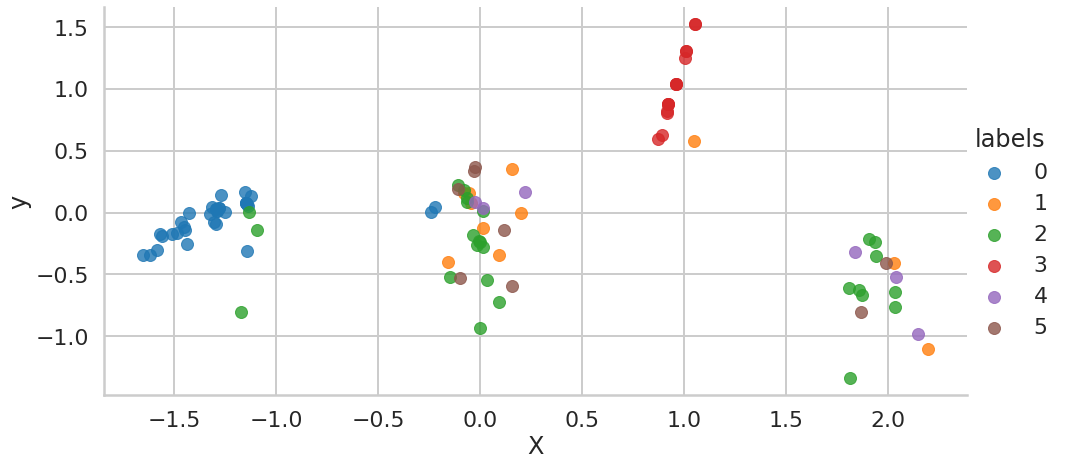

In [32]:
## Plot with K=6
kmeans6 = KMeans(n_clusters=6, random_state=21)
plot_pca(matrix, x_cols, kmeans6)

## Decompositions

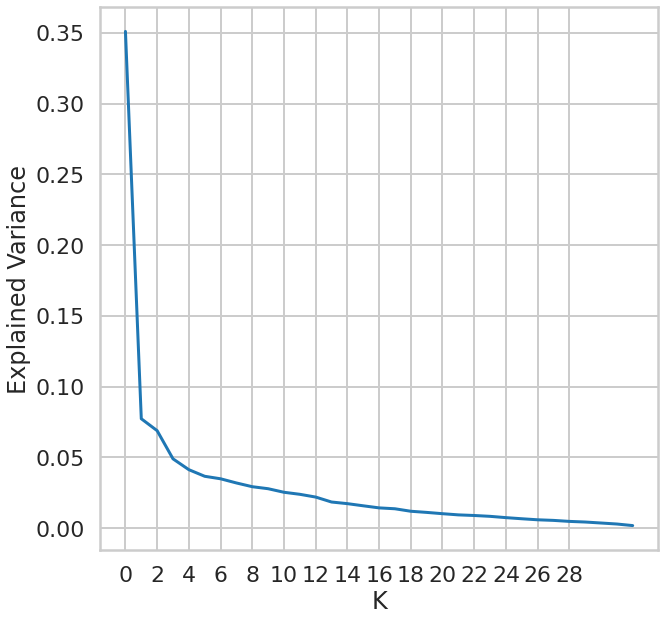

In [33]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA()
a = pca.fit(matrix).explained_variance_ratio_
fig, ax = plt.subplots(figsize=(10, 10))
pd.Series(a).plot()
plt.xlabel("K")
plt.ylabel("Explained Variance")
ax.set_xticks(np.arange(0, 30, 2))

# Best K = 4

## Affinity Propagations

In [34]:
AP = AffinityPropagation()
AP.fit(x_cols)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [35]:
## Estimating number of clusters
len(AP.cluster_centers_indices_)

14

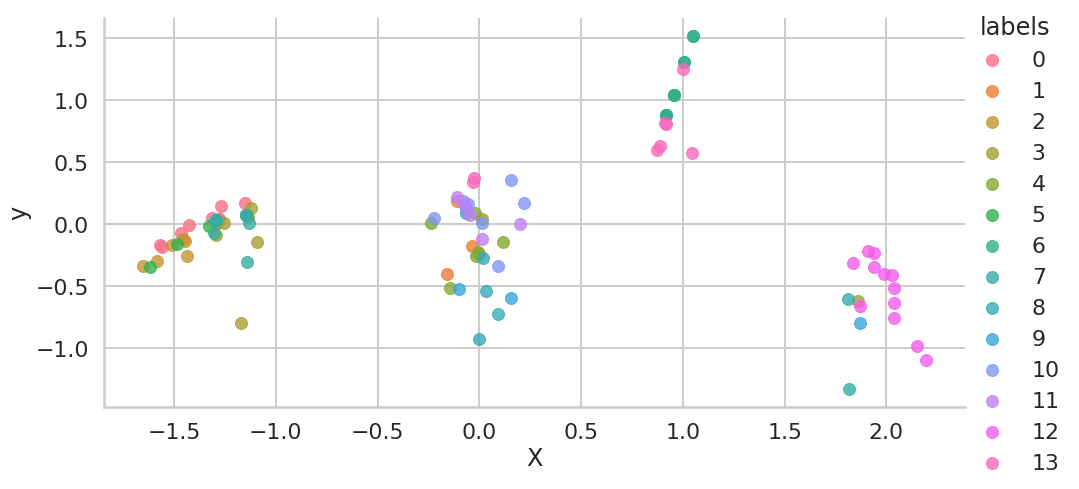

In [36]:
plot_pca(matrix, x_cols, AP)

## Spectral Clustering with PCA

In [37]:
SC = SpectralClustering(n_clusters=4)
SC.fit(x_cols)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

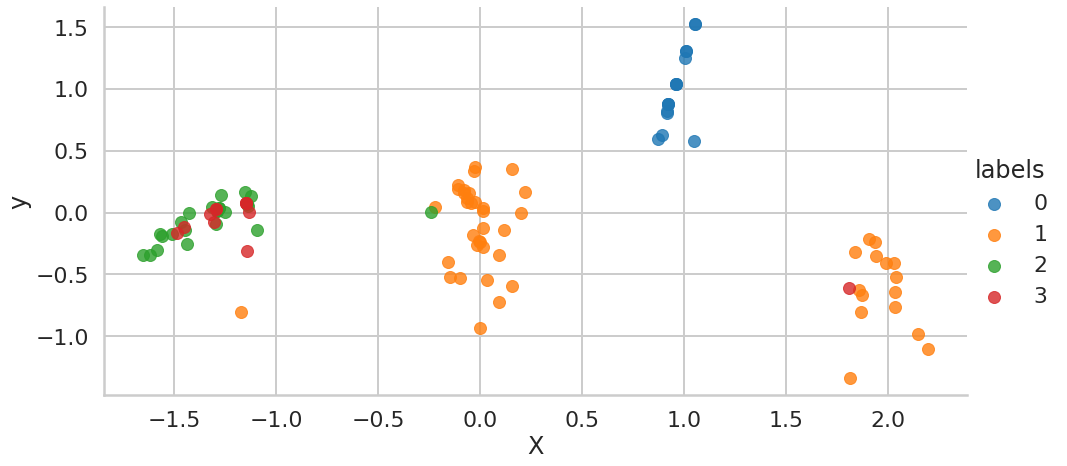

In [38]:
plot_pca(matrix, x_cols, SC)

## Agglomerative Clustering

In [39]:
AC = AgglomerativeClustering(n_clusters=4)
AC.fit(x_cols)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

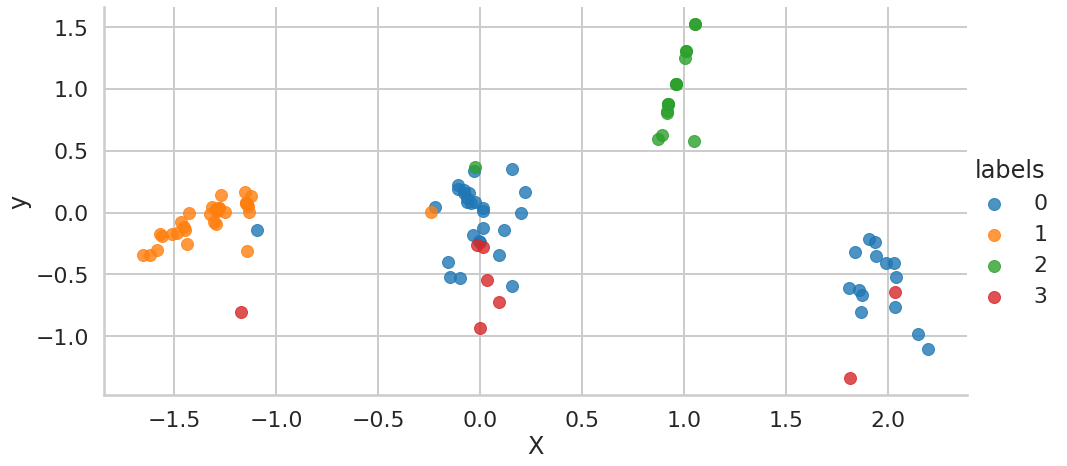

In [40]:
plot_pca(matrix, x_cols, AC)

## DBSCAN

In [41]:
DB = DBSCAN(eps=1, min_samples=5)
DB.fit(x_cols)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

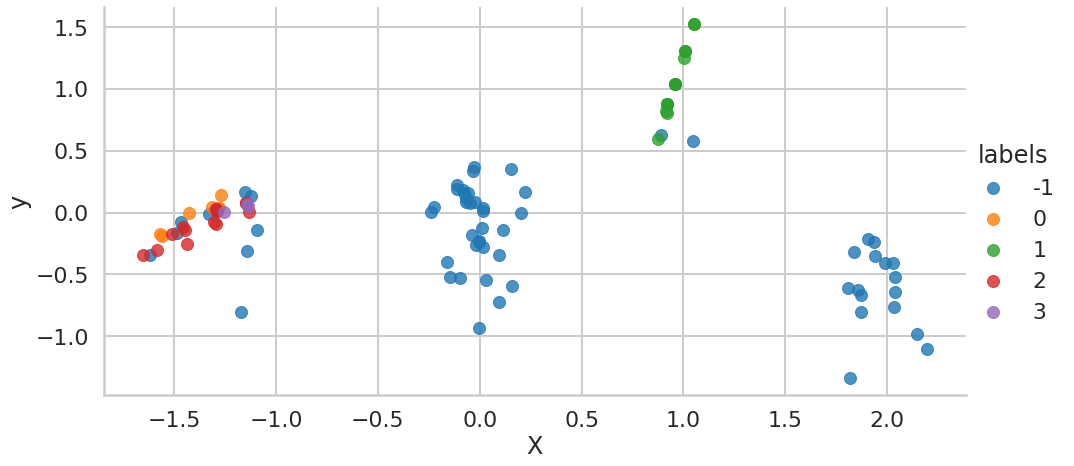

In [42]:
plot_pca(matrix, x_cols, DB)